In [3]:
import pandas as pd

# Create the dataset
data = {
    "Country": ["United States", "China", "India", "Russia", "Germany", "United Kingdom", 
                "Japan", "Canada", "Brazil", "Australia"],
    "Population (millions)": [331, 1439, 1380, 146, 83, 67, 126, 38, 213, 25],
    "GDP (Trillions USD)": [21.4, 14.7, 2.9, 1.5, 3.8, 2.7, 5.1, 1.8, 2.1, 1.3],
    "CO2 Emissions (Mt)": [5000, 10000, 2500, 1500, 800, 400, 1100, 600, 500, 400],
    "CO2 per Capita (tons)": [15.11, 6.95, 1.81, 10.27, 9.64, 5.97, 8.73, 15.79, 2.35, 16.00]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV in the current working directory
csv_path = "co2_emissions.csv"  # This will save in the same folder as your notebook
df.to_csv(csv_path, index=False)

print(f"CSV saved as {csv_path}")


CSV saved as co2_emissions.csv


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("co2_emissions.csv")

# Show the first few rows
print(df.head())


         Country  Population (millions)  GDP (Trillions USD)  \
0  United States                    331                 21.4   
1          China                   1439                 14.7   
2          India                   1380                  2.9   
3         Russia                    146                  1.5   
4        Germany                     83                  3.8   

   CO2 Emissions (Mt)  CO2 per Capita (tons)  
0                5000                  15.11  
1               10000                   6.95  
2                2500                   1.81  
3                1500                  10.27  
4                 800                   9.64  


In [5]:
# Check the shape of the dataset
print("Rows and columns:", df.shape)

# Get info about data types and nulls
print("\nInfo:")
print(df.info())

# Get basic statistics
print("\nStatistics:")
print(df.describe())


Rows and columns: (10, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                10 non-null     object 
 1   Population (millions)  10 non-null     int64  
 2   GDP (Trillions USD)    10 non-null     float64
 3   CO2 Emissions (Mt)     10 non-null     int64  
 4   CO2 per Capita (tons)  10 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 532.0+ bytes
None

Statistics:
       Population (millions)  GDP (Trillions USD)  CO2 Emissions (Mt)  \
count              10.000000            10.000000           10.000000   
mean              384.800000             5.730000         2280.000000   
std               547.720488             6.777913         3060.428438   
min                25.000000             1.300000          400.000000   
25%                71.000000             1.875000   

In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Country                  0
Population (millions)    0
GDP (Trillions USD)      0
CO2 Emissions (Mt)       0
CO2 per Capita (tons)    0
dtype: int64


In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Country                  0
Population (millions)    0
GDP (Trillions USD)      0
CO2 Emissions (Mt)       0
CO2 per Capita (tons)    0
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shagu\AppData\Local\Temp\ipykernel_2348\3775797865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CO2 per Capita (tons)", y="Country", data=top_per_capita, palette="Blues_d")


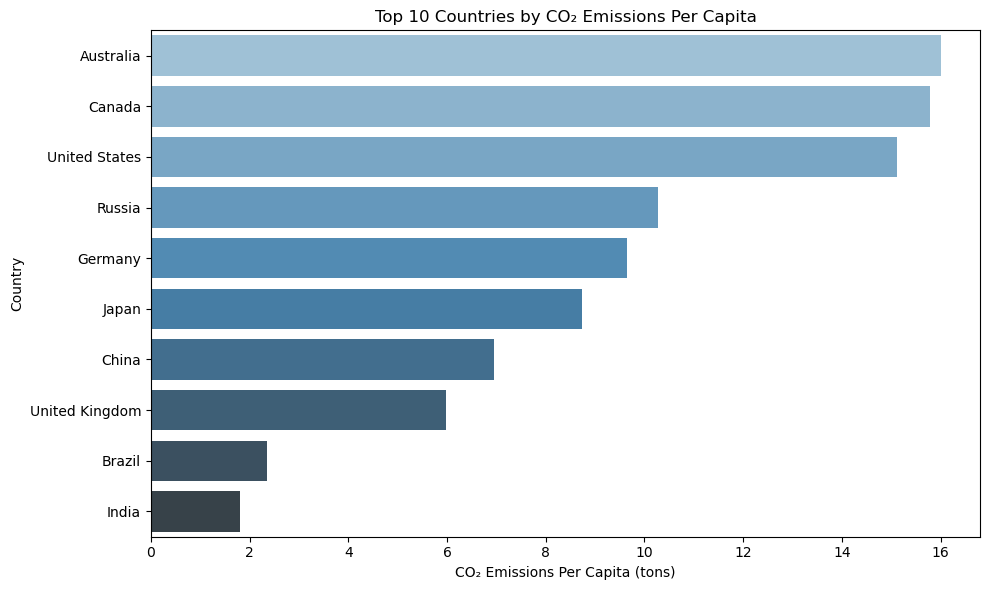

In [13]:
top_per_capita = df.sort_values("CO2 per Capita (tons)", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="CO2 per Capita (tons)", y="Country", data=top_per_capita, palette="Blues_d")
plt.title("Top 10 Countries by CO₂ Emissions Per Capita")
plt.xlabel("CO₂ Emissions Per Capita (tons)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


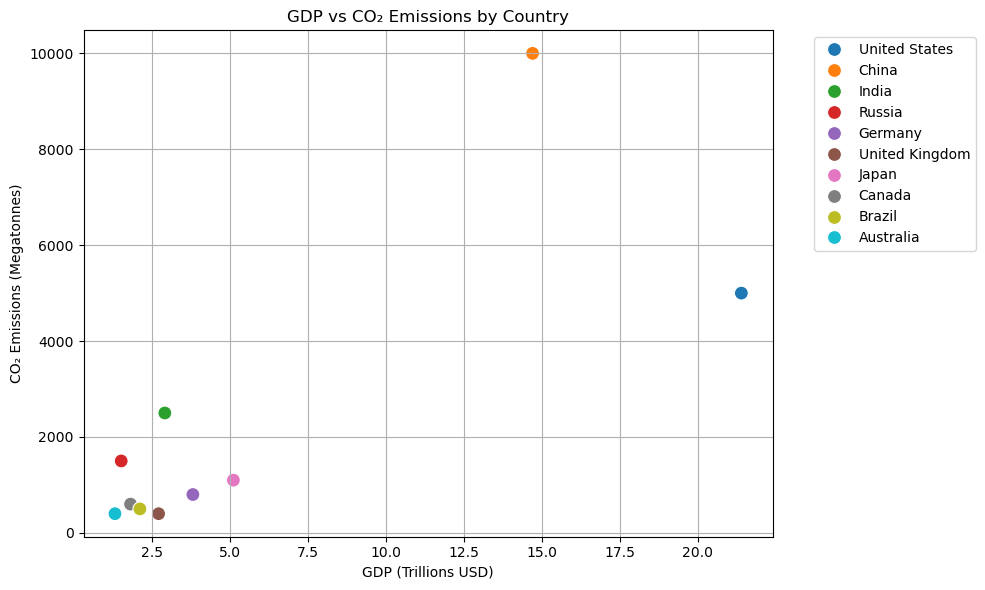

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GDP (Trillions USD)", y="CO2 Emissions (Mt)", hue="Country", data=df, s=100)

plt.title("GDP vs CO₂ Emissions by Country")
plt.xlabel("GDP (Trillions USD)")
plt.ylabel("CO₂ Emissions (Megatonnes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
df["CO2 per GDP (Mt per Trillion USD)"] = df["CO2 Emissions (Mt)"] / df["GDP (Trillions USD)"]
df[["Country", "CO2 per GDP (Mt per Trillion USD)"]].sort_values("CO2 per GDP (Mt per Trillion USD)", ascending=False)


,Country,CO2 per GDP (Mt per Trillion USD)
3,Russia,1000.000000
2,India,862.068966
1,China,680.272109
7,Canada,333.333333
9,Australia,307.692308
8,Brazil,238.095238
0,United States,233.644860
6,Japan,215.686275
4,Germany,210.526316
5,United Kingdom,148.148148


In [17]:
# Save DataFrame to a CSV file
df.to_csv("co2_analysis_final.csv", index=False)
